In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
STUDENT_ID = "PES2UG23CS376"

In [4]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS376
Polynomial Type: CUBIC: y = 2.08x³ + -0.08x² + 5.84x + 8.30
Noise Level: ε ~ N(0, 2.21)
Architecture: Input(1) → Hidden(64) → Hidden(64) → Output(1)
Learning Rate: 0.001
Architecture Type: Balanced Architecture


In [5]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


In [13]:
import numpy as np

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)


if __name__ == "__main__":

    test_values = np.array([-2, -1, 0, 1, 2, 3.5, -0.5])

    print("Input values:", test_values)
    print("ReLU output:", relu(test_values))
    print("ReLU derivative:", relu_derivative(test_values))


    test_matrix = np.array([[-1, 2], [3, -4]])
    print("\nMatrix input:")
    print(test_matrix)
    print("ReLU output:")
    print(relu(test_matrix))
    print("ReLU derivative:")
    print(relu_derivative(test_matrix))

Input values: [-2.  -1.   0.   1.   2.   3.5 -0.5]
ReLU output: [0.  0.  0.  1.  2.  3.5 0. ]
ReLU derivative: [0. 0. 0. 1. 1. 1. 0.]

Matrix input:
[[-1  2]
 [ 3 -4]]
ReLU output:
[[0 2]
 [3 0]]
ReLU derivative:
[[0. 1.]
 [1. 0.]]


In [14]:
import numpy as np

def mse_loss(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_diff = (y_true - y_pred) ** 2
    return np.mean(squared_diff)

def mse_derivative(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = len(y_true)
    return (2/n) * (y_pred - y_true)

if __name__ == "__main__":
    y_true = np.array([1, 2, 3, 4, 5])
    y_pred = np.array([1.1, 2.2, 2.9, 3.8, 5.2])

    print(mse_loss(y_true, y_pred))
    print(mse_derivative(y_true, y_pred))

    perfect_pred = np.array([1, 2, 3, 4, 5])
    print(mse_loss(y_true, perfect_pred))

    print(mse_loss(3, 3.5))


0.028000000000000046
[ 0.04  0.08 -0.04 -0.08  0.08]
0.0
0.25


In [15]:
import numpy as np

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, size=(hidden1, input_dim))
    b1 = np.zeros((hidden1, 1))

    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, size=(hidden2, hidden1))
    b2 = np.zeros((hidden2, 1))

    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, size=(output_dim, hidden2))
    b3 = np.zeros((output_dim, 1))

    return W1, b1, W2, b2, W3, b3

if __name__ == "__main__":
    input_dim = 1
    hidden1 = 4
    hidden2 = 3
    output_dim = 1

    W1, b1, W2, b2, W3, b3 = xavier_initialization(input_dim, hidden1, hidden2, output_dim)

    print(W1.shape, b1.shape)
    print(W2.shape, b2.shape)
    print(W3.shape, b3.shape)

    print(W1.mean(), W1.std())
    print(W2.mean(), W2.std())
    print(W3.mean(), W3.std())

    print(b1.sum(), b2.sum(), b3.sum())

    expected_std_1 = np.sqrt(2 / (input_dim + hidden1))
    expected_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    expected_std_3 = np.sqrt(2 / (hidden2 + output_dim))

    print(expected_std_1, W1.std())
    print(expected_std_2, W2.std())
    print(expected_std_3, W3.std())


(4, 1) (4, 1)
(3, 4) (3, 1)
(1, 3) (1, 1)
0.3336373135294118 0.8261170792831801
0.1030661519914739 0.5210403972370901
-0.1260535195385711 0.6310505478663989
0.0 0.0 0.0
0.6324555320336759 0.8261170792831801
0.5345224838248488 0.5210403972370901
0.7071067811865476 0.6310505478663989


In [16]:
import numpy as np

def relu(z):
    return np.maximum(0, z)

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    z1 = W1 @ X + b1
    a1 = relu(z1)
    z2 = W2 @ a1 + b2
    a2 = relu(z2)
    z3 = W3 @ a2 + b3
    return z1, a1, z2, a2, z3

if __name__ == "__main__":
    batch_size = 3
    input_dim = 1
    hidden1 = 4
    hidden2 = 3
    output_dim = 1

    X = np.random.randn(input_dim, batch_size)
    W1 = np.random.randn(hidden1, input_dim) * 0.1
    b1 = np.zeros((hidden1, 1))
    W2 = np.random.randn(hidden2, hidden1) * 0.1
    b2 = np.zeros((hidden2, 1))
    W3 = np.random.randn(output_dim, hidden2) * 0.1
    b3 = np.zeros((output_dim, 1))

    z1, a1, z2, a2, z3 = forward_pass(X, W1, b1, W2, b2, W3, b3)

    print(X.shape)
    print(z1.shape, a1.shape)
    print(z2.shape, a2.shape)
    print(z3.shape)

    print(X)
    print(z1)
    print(a1)
    print(z2)
    print(a2)
    print(z3)

    print(np.any(z1 < 0))
    print(np.any(a1 < 0))
    print(np.any(z2 < 0))
    print(np.any(a2 < 0))


(1, 3)
(4, 3) (4, 3)
(3, 3) (3, 3)
(1, 3)
[[0.62958617 0.73803391 0.65226177]]
[[0.00814097 0.00954327 0.00843418]
 [0.0632147  0.07410359 0.06549149]
 [0.08775741 0.10287384 0.09091814]
 [0.02415932 0.02832082 0.02502946]]
[[0.00814097 0.00954327 0.00843418]
 [0.0632147  0.07410359 0.06549149]
 [0.08775741 0.10287384 0.09091814]
 [0.02415932 0.02832082 0.02502946]]
[[ 0.01211148  0.01419771  0.01254769]
 [ 0.01201057  0.01407942  0.01244315]
 [-0.00318602 -0.00373482 -0.00330077]]
[[0.01211148 0.01419771 0.01254769]
 [0.01201057 0.01407942 0.01244315]
 [0.         0.         0.        ]]
[[-0.00342513 -0.00401511 -0.00354849]]
False
False
True
False


In [17]:
import numpy as np

def relu_derivative(z):
    return (z > 0).astype(float)

def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    m = X.shape[1]
    dY_pred = (2/m) * (Y_pred - Y_true)
    dz3 = dY_pred
    dW3 = dz3 @ a2.T
    db3 = np.sum(dz3, axis=1, keepdims=True)
    da2 = W3.T @ dz3
    dz2 = da2 * relu_derivative(z2)
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1, keepdims=True)
    da1 = W2.T @ dz2
    dz1 = da1 * relu_derivative(z1)
    dW1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

if __name__ == "__main__":
    batch_size = 3
    input_dim = 1
    hidden1 = 4
    hidden2 = 3
    output_dim = 1

    X = np.random.randn(input_dim, batch_size)
    Y_true = np.random.randn(output_dim, batch_size)
    z1 = np.random.randn(hidden1, batch_size)
    a1 = np.maximum(0, z1)
    z2 = np.random.randn(hidden2, batch_size)
    a2 = np.maximum(0, z2)
    Y_pred = np.random.randn(output_dim, batch_size)
    W2 = np.random.randn(hidden2, hidden1) * 0.1
    W3 = np.random.randn(output_dim, hidden2) * 0.1

    dW1, db1, dW2, db2, dW3, db3 = backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3)

    print(dW1.shape, db1.shape)
    print(dW2.shape, db2.shape)
    print(dW3.shape, db3.shape)
    print(dW1.mean(), dW1.std())
    print(dW2.mean(), dW2.std())
    print(dW3.mean(), dW3.std())
    print(db1.mean(), db1.std())
    print(db2.mean(), db2.std())
    print(db3.mean(), db3.std())
    print((hidden1, input_dim), dW1.shape)
    print((hidden2, hidden1), dW2.shape)
    print((output_dim, hidden2), dW3.shape)


(4, 1) (4, 1)
(3, 4) (3, 1)
(1, 3) (1, 1)
0.002791585641265501 0.0019419162234544888
-0.03558789428205611 0.10706871026289064
-0.5247735180442746 0.6281058586411102
0.005814036306560356 0.00928616503897278
-0.074092656849969 0.08108889290764404
-1.1069484124301618 0.0
(4, 1) (4, 1)
(3, 4) (3, 4)
(1, 3) (1, 3)


In [19]:
import numpy as np


def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def mse_loss(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_diff = (y_true - y_pred) ** 2
    return np.mean(squared_diff)

def xavier_initialization(input_dim, hidden1, hidden2, output_dim):

    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, size=(hidden1, input_dim))
    b1 = np.zeros((hidden1, 1))


    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, size=(hidden2, hidden1))
    b2 = np.zeros((hidden2, 1))


    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, size=(output_dim, hidden2))
    b3 = np.zeros((output_dim, 1))

    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    z1 = W1 @ X + b1
    a1 = relu(z1)
    z2 = W2 @ a1 + b2
    a2 = relu(z2)
    z3 = W3 @ a2 + b3
    return z1, a1, z2, a2, z3

def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    m = X.shape[1]


    dY_pred = (2/m) * (Y_pred - Y_true)
    dz3 = dY_pred
    dW3 = dz3 @ a2.T
    db3 = np.sum(dz3, axis=1, keepdims=True)


    da2 = W3.T @ dz3
    dz2 = da2 * relu_derivative(z2)
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1, keepdims=True)


    da1 = W2.T @ dz2
    dz1 = da1 * relu_derivative(z1)
    dW1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10,
                        hidden1=8, hidden2=4, learning_rate=0.01):
    """
    Complete Neural Network Training Loop

    Implement training with early stopping and track losses

    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Test data for validation
        epochs: Maximum number of training epochs
        patience: Early stopping patience
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        learning_rate: Learning rate for gradient descent

    Returns:
        best_weights: Best model weights
        train_losses: Training loss history
        test_losses: Test loss history
    """


    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)


    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0


    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):


        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)


        train_loss = mse_loss(Y_train, Y_pred_train)


        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)


        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3


        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)


        train_losses.append(train_loss)
        test_losses.append(test_loss)


        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")


        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1


        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break


    print("-" * 50)
    print(f"Training completed!")
    print(f"Final train loss: {train_losses[-1]:.6f}")
    print(f"Final test loss: {test_losses[-1]:.6f}")
    print(f"Best test loss: {best_test_loss:.6f}")

    return best_weights, train_losses, test_losses


if __name__ == "__main__":

    np.random.seed(42)


    X_train = np.random.randn(1, 100)
    Y_train = 2 * X_train + 1 + 0.1 * np.random.randn(1, 100)

    X_test = np.random.randn(1, 20)
    Y_test = 2 * X_test + 1 + 0.1 * np.random.randn(1, 20)

    print("Sample data shapes:")
    print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
    print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")
    print()


    best_weights, train_losses, test_losses = train_neural_network(
        X_train, Y_train, X_test, Y_test,
        epochs=100, patience=10,
        hidden1=8, hidden2=4, learning_rate=0.01
    )

    print(f"\nTraining history length: {len(train_losses)} epochs")
    print(f"Best weights saved: {best_weights is not None}")

Sample data shapes:
X_train: (1, 100), Y_train: (1, 100)
X_test: (1, 20), Y_test: (1, 20)

Starting training...
Architecture: 1 → 8 → 4 → 1
Learning Rate: 0.01
Max Epochs: 100, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 2.704239, Test Loss = 5.748355
Epoch  40: Train Loss = 1.103531, Test Loss = 2.751356
Epoch  60: Train Loss = 0.296147, Test Loss = 1.063407
Epoch  80: Train Loss = 0.143352, Test Loss = 0.594802
Epoch 100: Train Loss = 0.101025, Test Loss = 0.431418
--------------------------------------------------
Training completed!
Final train loss: 0.101025
Final test loss: 0.431418
Best test loss: 0.431418

Training history length: 100 epochs
Best weights saved: True


In [21]:
print("Training Neural Network with your specific configuration...")
best_weights, train_losses, test_losses = train_neural_network(
    X_train_scaled.T, Y_train_scaled.T, X_test_scaled.T, Y_test_scaled.T,
    epochs=500, patience=10, hidden1=8, hidden2=4, learning_rate=0.01
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 8 → 4 → 1
Learning Rate: 0.01
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.880541, Test Loss = 0.876187
Epoch  40: Train Loss = 0.827286, Test Loss = 0.822313
Epoch  60: Train Loss = 0.758698, Test Loss = 0.753148
Epoch  80: Train Loss = 0.677566, Test Loss = 0.671830
Epoch 100: Train Loss = 0.593171, Test Loss = 0.587921
Epoch 120: Train Loss = 0.517324, Test Loss = 0.513120
Epoch 140: Train Loss = 0.456910, Test Loss = 0.453874
Epoch 160: Train Loss = 0.411826, Test Loss = 0.409768
Epoch 180: Train Loss = 0.378858, Test Loss = 0.377529
Epoch 200: Train Loss = 0.354789, Test Loss = 0.353979
Epoch 220: Train Loss = 0.337128, Test Loss = 0.336683
Epoch 240: Train Loss = 0.324029, Test Loss = 0.323842
Epoch 260: Train Loss = 0.314128, Test Loss = 0.314115
Epoch 280: Train Loss = 0.306411, Test Loss = 0.306511
Epoch

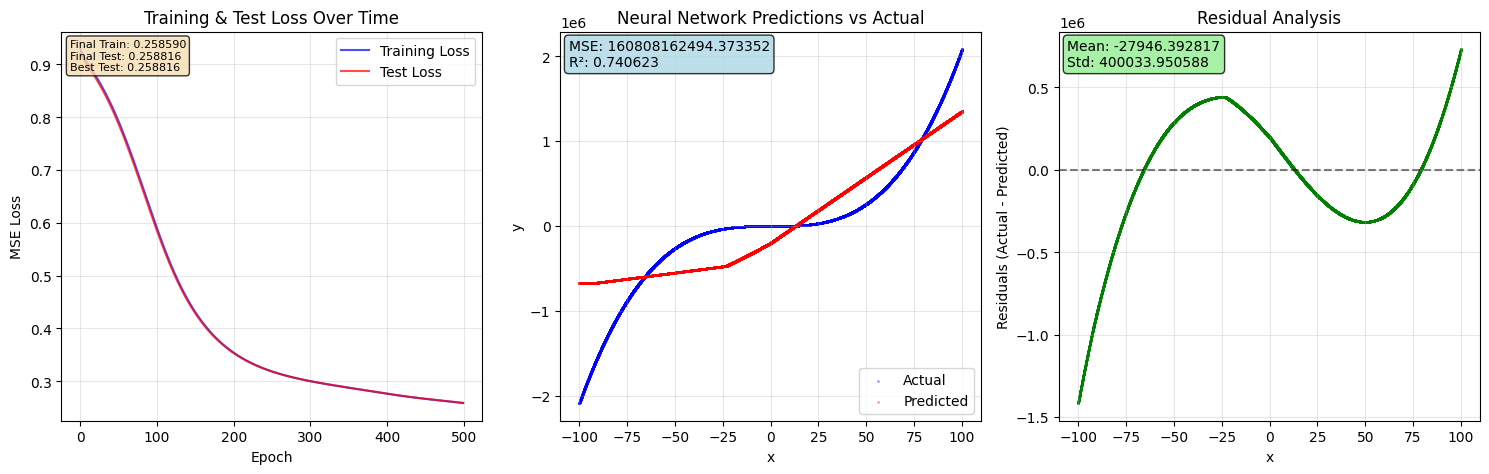


MODEL PERFORMANCE SUMMARY
Number of test samples: 20000
Mean Squared Error: 160808162494.373352
Root Mean Squared Error: 401008.930692
R² Score: 0.740623
Mean Absolute Error: 315642.062784
Training epochs completed: 500
Best test loss achieved: 0.258816


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Add convergence info text box
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]
min_test_loss = min(test_losses)
plt.text(0.02, 0.98, f'Final Train: {final_train_loss:.6f}\nFinal Test: {final_test_loss:.6f}\nBest Test: {min_test_loss:.6f}',
         transform=plt.gca().transAxes, verticalalignment='top', fontsize=8,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = best_weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled.T, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled.reshape(-1, 1)).flatten()
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()
X_test_orig = scaler_X.inverse_transform(X_test_scaled.reshape(-1, 1)).flatten()

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate and display performance metrics
mse = np.mean((Y_test_orig - Y_pred_orig) ** 2)
r2 = 1 - (np.sum((Y_test_orig - Y_pred_orig) ** 2) /
          np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2))

plt.text(0.02, 0.98, f'MSE: {mse:.6f}\nR²: {r2:.6f}',
         transform=plt.gca().transAxes, verticalalignment='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Residual plot (uncommented and completed)
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

# Add residual statistics
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.text(0.02, 0.98, f'Mean: {mean_residual:.6f}\nStd: {std_residual:.6f}',
         transform=plt.gca().transAxes, verticalalignment='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Print performance summary
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Number of test samples: {len(Y_test_orig)}")
print(f"Mean Squared Error: {mse:.6f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.6f}")
print(f"R² Score: {r2:.6f}")
print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.6f}")
print(f"Training epochs completed: {len(train_losses)}")
print(f"Best test loss achieved: {min_test_loss:.6f}")
print("="*50)

In [26]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 1,199,512.44
Ground Truth (formula):    1,528,441.98
Absolute Error:            328,929.53
Relative Error:            21.521%


In [27]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.258590
Final Test Loss:     0.258816
R² Score:           0.7406
Total Epochs Run:   500
